In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [2]:
data_21 = pd.read_csv("Data/2021.csv")
X_21 = data_21[["MOV/A", "ORtg/A", "DRtg/A", "NRtg/A"]]
teams = data_21.Team

In [3]:
data = pd.read_csv("Data/2000 to 2020 data.csv")

In [4]:
data.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000
1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03,2000
2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37,2000
3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41,2000
4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94,2000


In [5]:
X = data[["MOV/A", "ORtg/A", "DRtg/A", "NRtg/A"]]
y = data["W"].values.reshape(-1,1)
feature_names = X.columns
print(X.shape, y.shape)

(625, 4) (625, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9102617409009788
Testing Score: 0.9087889905452942


Text(0.5, 1.0, 'Residual Plot')

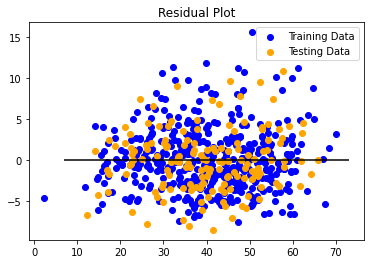

In [8]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

C:\Users\dania\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.06369426751592357

In [10]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2786976580859798, 'MOV/A'),
 (0.26057065539643565, 'NRtg/A'),
 (0.23150296155155825, 'ORtg/A'),
 (0.22922872496602642, 'DRtg/A')]

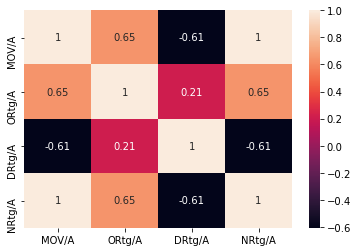

In [11]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = data[["MOV/A", "ORtg/A", "DRtg/A", "NRtg/A"]].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
predictions = model.predict(X_21)
print(f"First 32 Predictions:   {predictions[:32]}")
print(f"First 32 Actual labels: {y_test[:32].tolist()}")

First 32 Predictions:   [[67.24875378]
 [58.39748759]
 [55.01512965]
 [54.68663931]
 [53.16258879]
 [50.5530447 ]
 [50.43155199]
 [46.08731777]
 [45.28433826]
 [43.50391567]
 [42.78289128]
 [41.94509975]
 [40.82214428]
 [41.16746689]
 [40.29886893]
 [40.07811976]
 [40.55277475]
 [37.87845727]
 [37.75579648]
 [37.15735132]
 [37.263211  ]
 [35.63670881]
 [30.03932598]
 [27.72915581]
 [26.19708609]
 [26.63476481]
 [25.4386792 ]
 [20.48914275]
 [20.22145659]
 [19.05573527]]
First 32 Actual labels: [[55], [45], [40], [51], [53], [43], [33], [37], [33], [59], [66], [53], [19], [49], [29], [42], [53], [36], [47], [34], [42], [59], [31], [23], [33], [35], [34], [42], [21], [32], [46], [23]]


In [13]:
pred = [x[0] for x in predictions]
preds = pd.Series(pred)
predictions_df = pd.concat([teams, preds],axis =1)
predictions_df.rename(columns = {0: "Predicted Wins"}, inplace=True)
predictions_df

,Team,Predicted Wins
0,Utah Jazz,67.248754
1,Milwaukee Bucks,58.397488
2,Phoenix Suns,55.015130
3,Los Angeles Clippers,54.686639
4,Los Angeles Lakers,53.162589
5,Brooklyn Nets,50.553045
6,Denver Nuggets,50.431552
7,Philadelphia 76ers,46.087318
8,Toronto Raptors,45.284338
9,Golden State Warriors,43.503916


In [16]:
predictions_df.to_csv ('Data/predictions.csv', index = False, header=True)

C:\Users\dania\anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


[]

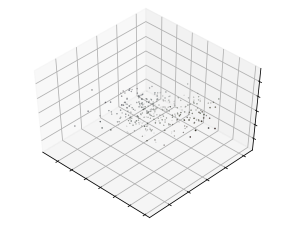

In [14]:
X1 = data[["MOV/A", "ORtg/A", "DRtg/A"]]
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X1)
X1 = pca.transform(X1)

# for name, label in [('MOV/A', 0), ('ORtg/A', 1), ('DRtg/A', 2)]:
#     ax.text3D(X1[y == label, 0].mean(),
#               X1[y == label, 1].mean() + 1.5,
#               X1[y == label, 2].mean() ,name,
        #      horizontalalignment='center',
         #     bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(float)
plt.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
